# HW-5: Malware Classification (Due 5th January, 2023)

**Instructions:**

Suppose your company is struggling with a series of computer virus attacks for the past several months. The viruses were grouped into a few types with some effort. However, it takes a long time to sort out what kind of virus it is when been hit with. Thus, as a senior IT department member, you undertook a project to classify the virus as quickly as possible. You've been given a dataset of the features that may be handy (or not), and  also the associated virus type (target variable). 

You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc. To increase your grade you can add more elaboration such as using ensembling or exploiting feature selection/extraction techniques. **An evaluation rubric is provided.**

Please prepare a python notebook that describes the steps, present the results as well as your comments. 

You can download the data (csv file) [here](https://drive.google.com/file/d/1yxbibzUU8bjOyChDVFPfQ4viLduYdk29/view?usp=sharing).


## RUBRIC

### K-fold cross-validation

- [x] Level 1
- [x] Level 2
- [x] Level 3

### Hyperparameter search

- [x] Level 1
- [x] Level 2
- [x] Level 3

### Applying variety of algorithms

- [x] Logistic Regression
- [x] Decision Tree
- [x] Support Vector Machine (SVM)
- [x] Random Forests
- [x] kNN 
- [x] Naive Bayes
- [ ] Neural Networks

### Ensembling methods

- [ ] Level 1
- [ ] Level 2
- [ ] Level 3

### Feature selection/extraction

- [x] Level 1
- [x] Level 2
- [x] Level 3

# Import Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics.pairwise import polynomial_kernel

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
!git clone https://github.com/burakcbdn/CENG463_HW5

Cloning into 'CENG463_HW5'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
file_path = "/content/CENG463_HW5/hw5_data.csv"

In [ ]:
virusDF = pd.read_csv(file_path)

In [ ]:
display(virusDF)

In [ ]:
y = virusDF['target']
X = virusDF.drop('target', axis=1)

# Analyzing Data

In [ ]:
targetClasses = []

for i in virusDF['target']:
  if i not in targetClasses:
    targetClasses.append(i)

print(f"There is {len(targetClasses)} classes in this dataset which are:")

for t in targetClasses:
  print(f" - {t}")


There is 9 classes in this dataset which are:
 - 2
 - 8
 - 6
 - 4
 - 1
 - 3
 - 9
 - 5
 - 7


# Algorithms

- Logistic Regression
- Decision Tree
- Support Vector Machine (SVM)
- Random Forests
- kNN 
- Naive Bayes
- Neural Networks

In [ ]:
def modelEvaluation(model, X_train, y_train, X_test, y_test, name):
  # train the model on the training set

  # make predictions on the testing set
  y_pred = model.predict(X_test)

  print(f"Score Metrics for {name}")

  # evaluate the model using various metrics
  precision = precision_score(y_test, y_pred, average='micro')
  print(f"Precision: {precision:.2f}")

  recall = recall_score(y_test, y_pred, average='micro')
  print(f"Recall: {recall:.2f}")

  f1 = f1_score(y_test, y_pred, average='micro')
  print(f"F1 score: {f1:.2f}")

  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f"Balanced accuracy: {balanced_accuracy:.2f}")

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")

  print("== == == == == == == == == == == == == == == == ==")
  return {
      'f1Score': f1,
      'accuracy': accuracy,
      'balancedAccuracy': balanced_accuracy,
      'precision': precision,
      'recall': recall,
  }

In [ ]:
def tuneHyperParameters(model, params, X_train, y_train):

  # create a grid search object
  clf = GridSearchCV(model, params, cv=5)

  # fit the grid search object to the training data
  clf.fit(X_train, y_train)

  # print the best hyperparameters
  print(clf.best_params_)

  return (clf, clf.best_params_)


In [ ]:
def selectBestNFeatures(model, X_train, y_train, k=10):
  # import necessary library
  from sklearn.feature_selection import RFE

  # create a feature selection object
  selection = RFE(model, n_features_to_select=k, step=1)

  # fit the feature selection object to the training data
  selection.fit(X_train, y_train)

  # select the best features using the feature selection object
  X_train_selected = selection.transform(X_train)
  X_test_selected = selection.transform(X_test)

  return selection

In [ ]:
def scale_data(X_train, X_test):
  # import necessary library
  from sklearn.preprocessing import StandardScaler

  # create a scaler object
  scaler = StandardScaler()

  # fit the scaler object to the training data
  scaler.fit(X_train)

  # transform the training and test data using the scaler object
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  

  return (X_train_scaled, X_test_scaled)

In [ ]:
def selectFeaturesUsingFilter(X, y, scoring, mode='k_best', param=5):

  # Create the feature selector
  selector = GenericUnivariateSelect(score_func=scoring, mode=mode, param=param)
  
  # Fit the selector to the data
  selector.fit(X, y)
  
  # Get the selected features
  mask = selector.get_support()
  X_selected = X[:, mask]
  
  return X_selected, mask

In [ ]:
models = [
    {
        'name': 'LogisticRegression',
        'model': LogisticRegression(max_iter=10000000),
        'params': 
            {
              'C': [ 10,50,75, 250],
            }
        ,
    },
    {
        'name': 'DecisionTreeClassifier',
        'model': DecisionTreeClassifier(),
        'params': {
          'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10, 20],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]
      }
    },
    {
        'name': 'SVC',
        'model': SVC(),
        'params': {
          'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01],
          'kernel': ['rbf', 'poly']
      },
    },
    {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'params':  {
            'n_estimators': [5, 9, 15, 20],
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20],
            #'min_samples_split': [2, 5, 10],
      },
    },
    {
        'name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [9],
            'weights': ['uniform', 'distance'],
        },
    },
    {
        'name': 'GaussianNB',
        'model': GaussianNB(),
        'params': {},
    },
]


In [ ]:
def createFilteredDF(X, y, k=10):
  X_selected, mask = selectFeaturesUsingFilter(X.to_numpy(), y.to_numpy(), scoring= mutual_info_classif, param=k )
  newVirusDF = pd.DataFrame(X_selected)

  columnNames = list(X.columns)

  newColumns = []

  for i in range(len(mask)):
    if (mask[i]):
      newColumns.append(columnNames[i])

  newVirusDF.set_axis(newColumns, axis=1, inplace=True)

  X_train, X_test, y_train, y_test  = train_test_split(newVirusDF, y, random_state=10)
  X_train, X_test = scale_data(X_train, X_test)

  return (X_train, X_test, y_train, y_test)


In [ ]:
def displayModelData(modelData, k):
  params = modelData['params']
  name = modelData['name']

  print('== == == == == == == == == == == == ')
  print(f"Using {name}")
  print(f"Feature count: {k}")
  print(f"Parameters to tune:")

  for param in params.keys():
    print(f"  - {param}: {params[param]}")
  
  print("-- -- -- -- -- -- -- -- -- -- -- -- ")
  print("")

def displayBestParams(modelData, bestParams):
  params = modelData['params']
  name = modelData['name']

  print(f"Selected best parameters for {name}")
  for param in bestParams.keys():
    print(f"  - {param}: {bestParams[param]}")

  print("-- -- -- -- -- -- -- -- -- -- -- -- ")

def displayDFData(k):
  print('== == == == == == == == == == == == ')
  print('== == == == == == == == == == == == ')
  print(f"Creating DF with selection of {k} features.")
  print('...')

In [ ]:


kValues = [25, 50, 100, 200]

modelResultData = {}

for k in kValues:
  displayDFData(k)
  X_train, X_test, y_train, y_test = createFilteredDF(X, y, k)

  modelResults = []

  print(f"New DF created with {k} features.")

  for modelData in models:
    # fit data
    model = modelData['model']
    params = modelData['params']
    name = modelData['name']

    displayModelData(modelData, k)


    print(f"Tuning hyper parameters for {name}...")

    # Feature Selection
    #model = selectBestNFeatures(model, X_train, y_train, k)
    # Hyper Parameters Search
    (model, bestParams) = tuneHyperParameters(model,params, X_train, y_train)

    print("Tuning completed.")

    displayBestParams(modelData, bestParams)

    # Evaluate Model
    scores = modelEvaluation(model, X_train, y_train, X_test, y_test, name)

    modelResults.append(
        {
            'model': name,
            'scores': scores,
            'fitted': model,
        }
    )
    
  modelResultData[k] = modelResults




== == == == == == == == == == == == 
== == == == == == == == == == == == 
Creating DF with selection of 25 features.
...
New DF created with 25 features.
== == == == == == == == == == == == 
Using LogisticRegression
Feature count: 25
Parameters to tune:
  - C: [10, 50, 75, 250]
-- -- -- -- -- -- -- -- -- -- -- -- 

Tuning hyper parameters for LogisticRegression...
{'C': 50}
Tuning completed.
Selected best parameters for LogisticRegression
  - C: 50
-- -- -- -- -- -- -- -- -- -- -- -- 
Score Metrics for LogisticRegression
Precision: 0.48
Recall: 0.48
F1 score: 0.48
Balanced accuracy: 0.27
Accuracy: 0.48
== == == == == == == == == == == == == == == == ==
== == == == == == == == == == == == 
Using DecisionTreeClassifier
Feature count: 25
Parameters to tune:
  - criterion: ['gini', 'entropy']
  - splitter: ['best', 'random']
  - max_depth: [None, 5, 10, 20]
  - min_samples_split: [2, 5, 10]
  - min_samples_leaf: [1, 2, 4]
-- -- -- -- -- -- -- -- -- -- -- -- 

Tuning hyper parameters for De

In [ ]:
# these values be used for plotting
modelGraphData = {}


for k in kValues:
  print("")
  print("== == == == == == == == == == == == ==")
  print(f"Model Data For {k}")
  # sorting models by their f1 score
  sortedModelResults = sorted(modelResultData[k], key= lambda m: m['scores']['f1Score'], reverse=True)
  for modelResult in sortedModelResults:
    print("== == == == == == == == == == == == ")
    print(f"Model: {modelResult['model']}")
    print(f"Scores")

    scores = modelResult['scores']


    tmp = modelGraphData.get(modelResult['model'], [])

    tmp.append(scores['f1Score'])

    modelGraphData[modelResult['model']] = tmp

    for title, score in scores.items():
      print(f" -{title}: {score}")
    print("== == == == == == == == == == == == ")
    print("")




== == == == == == == == == == == == ==
Model Data For 25
== == == == == == == == == == == == 
Model: RandomForestClassifier
Scores
 -f1Score: 0.884
 -accuracy: 0.884
 -balancedAccuracy: 0.7518182011010615
 -precision: 0.884
 -recall: 0.884
== == == == == == == == == == == == 

== == == == == == == == == == == == 
Model: DecisionTreeClassifier
Scores
 -f1Score: 0.8104
 -accuracy: 0.8104
 -balancedAccuracy: 0.6781320539408542
 -precision: 0.8104
 -recall: 0.8104
== == == == == == == == == == == == 

== == == == == == == == == == == == 
Model: KNeighborsClassifier
Scores
 -f1Score: 0.568
 -accuracy: 0.568
 -balancedAccuracy: 0.4084027627787902
 -precision: 0.568
 -recall: 0.568
== == == == == == == == == == == == 

== == == == == == == == == == == == 
Model: SVC
Scores
 -f1Score: 0.4968
 -accuracy: 0.4968
 -balancedAccuracy: 0.3424639765741046
 -precision: 0.4968
 -recall: 0.4968
== == == == == == == == == == == == 

== == == == == == == == == == == == 
Model: LogisticRegression
Scores
 

## Result

according to the output of the above for loop, we are getting the best score `(0.9)` with feature count with `200`, and `RandomForestClassifier`.

And best parameters for Random Forest are:

 - criterion: entropy
 - max_depth: 20
 - n_estimators: 20

With other feature counts (25, 50, 100, 200) again RandomForestClassifier gets the best score

For all feature count (k) values and 6 Classifier algorithms, this training proccess takes around 20 minutes (With standart Google Colab CPU, and default param grid.)

## Graphs


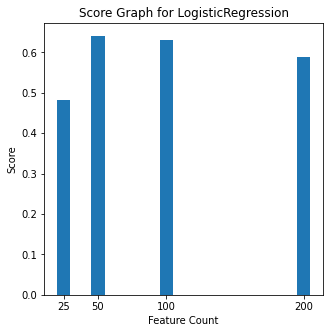

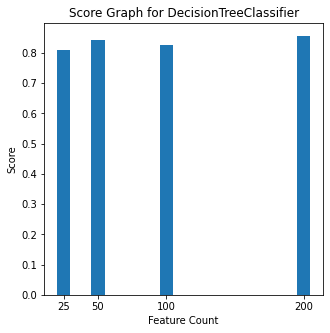

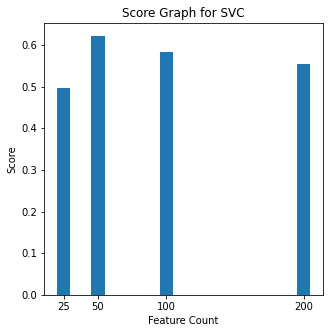

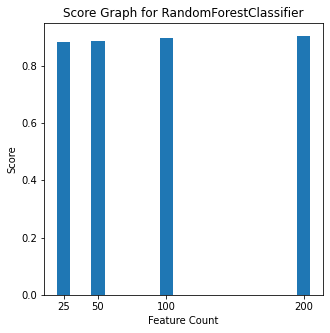

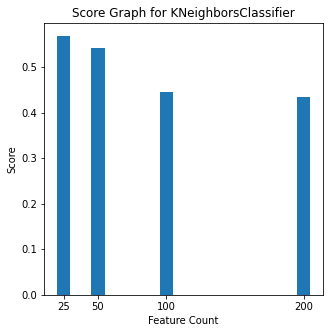

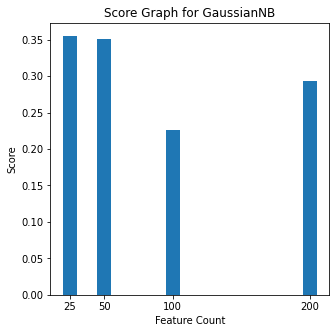

In [ ]:
import matplotlib.pyplot as plt

for model in models:
  fig = plt.figure(figsize = (5, 5)) 
  plt.bar(kValues, modelGraphData[model['name']], width=10) 
  
  plt.xticks(kValues)
  plt.xlabel("Feature Count") 
  plt.ylabel("Score") 
  plt.title(f"Score Graph for {model['name']}") 
  plt.show() 

  
